In [1]:
import dolfin as dl 
import matplotlib.pyplot as plt
import numpy as np 
import hippylib as hp 
import ufl

[sciml:1387913] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


In [2]:
def draw_sample(GRF):
    # initialize a vector of random noise
    noise = dl.Vector()
    GRF.init_vector(noise,"noise")
    # draw a sample from standard normal distribution
    hp.parRandom.normal(1., noise)
    # initialize a sample of Gaussian random field (GRF)
    sample = dl.Vector()
    GRF.init_vector(sample, 0)
    # draw a sample from GRF distribution
    GRF.sample(noise, sample)
    return sample

In [12]:
nd = 1
nx = 100
mesh = dl.UnitIntervalMesh(nx)
V = dl.FunctionSpace(mesh, 'Lagrange', 1)
gamma = .1
delta = .5
GRF = hp.LaplacianPrior(V, gamma, delta)
sample_d = draw_sample(GRF)+1.
sample_g = draw_sample(GRF)


In [48]:
d = hp.vector2Function(sample_d,V)
exp_D= 0.1*ufl.exp(d)
g = hp.vector2Function(sample_g,V)

In [49]:
def boundary(x,on_boundary):
    return on_boundary
# Use the boundary to setup the DirichletBC 
u0 = dl.Constant(0.0)
u_n = dl.interpolate(u0,V)
# g = dl.Function(V)
bc = dl.DirichletBC(V,u0,boundary)

In [50]:
u = dl.TrialFunction(V)
v = dl.TestFunction(V)
# f = dl.Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)",degree = 2)
# g = dl.Expression("sin(5*x[0])",degree = 2)
a = (exp_D)*dl.inner(dl.grad(u),dl.grad(v))*dl.dx
L = (u_n + g)*v*dl.dx

A,b = dl.assemble_system(a,L,bc)

u = dl.Function(V)

In [52]:

b.get_local()

array([ 0.00000000e+00, -2.16065041e-02, -2.13679118e-02, -1.92350629e-02,
       -1.72445176e-02, -1.96990533e-02, -2.06683241e-02, -2.19622680e-02,
       -2.11519690e-02, -2.15631383e-02, -2.18749970e-02, -2.40645050e-02,
       -2.46705186e-02, -2.33207054e-02, -2.13166529e-02, -2.06827327e-02,
       -2.03386947e-02, -2.09408923e-02, -2.10571712e-02, -1.72189039e-02,
       -1.57724989e-02, -1.29495607e-02, -1.42383004e-02, -1.57949539e-02,
       -1.46220941e-02, -1.50432318e-02, -1.65908380e-02, -1.69435265e-02,
       -1.86360129e-02, -1.94457656e-02, -1.63698561e-02, -1.56106737e-02,
       -1.50613834e-02, -1.37618047e-02, -1.31026825e-02, -1.48092187e-02,
       -1.42126555e-02, -1.15575966e-02, -1.00597383e-02, -1.04983891e-02,
       -7.54418104e-03, -3.53796479e-03, -1.17028929e-03, -1.04842235e-03,
       -3.41443363e-03, -3.58906556e-03, -1.75446040e-03, -4.88131428e-04,
        9.23788965e-04,  6.31047021e-03,  7.70503423e-03,  8.76325265e-03,
        9.67872507e-03,  

In [54]:
g.assign(dl.Constant(5.0))
b.get_local()

array([ 0.00000000e+00, -2.16065041e-02, -2.13679118e-02, -1.92350629e-02,
       -1.72445176e-02, -1.96990533e-02, -2.06683241e-02, -2.19622680e-02,
       -2.11519690e-02, -2.15631383e-02, -2.18749970e-02, -2.40645050e-02,
       -2.46705186e-02, -2.33207054e-02, -2.13166529e-02, -2.06827327e-02,
       -2.03386947e-02, -2.09408923e-02, -2.10571712e-02, -1.72189039e-02,
       -1.57724989e-02, -1.29495607e-02, -1.42383004e-02, -1.57949539e-02,
       -1.46220941e-02, -1.50432318e-02, -1.65908380e-02, -1.69435265e-02,
       -1.86360129e-02, -1.94457656e-02, -1.63698561e-02, -1.56106737e-02,
       -1.50613834e-02, -1.37618047e-02, -1.31026825e-02, -1.48092187e-02,
       -1.42126555e-02, -1.15575966e-02, -1.00597383e-02, -1.04983891e-02,
       -7.54418104e-03, -3.53796479e-03, -1.17028929e-03, -1.04842235e-03,
       -3.41443363e-03, -3.58906556e-03, -1.75446040e-03, -4.88131428e-04,
        9.23788965e-04,  6.31047021e-03,  7.70503423e-03,  8.76325265e-03,
        9.67872507e-03,  

In [55]:
dl.Function(V)

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 114), FiniteElement('Lagrange', interval, 1)), 275)

In [45]:
dl.solve(A,u.vector(),b)

1

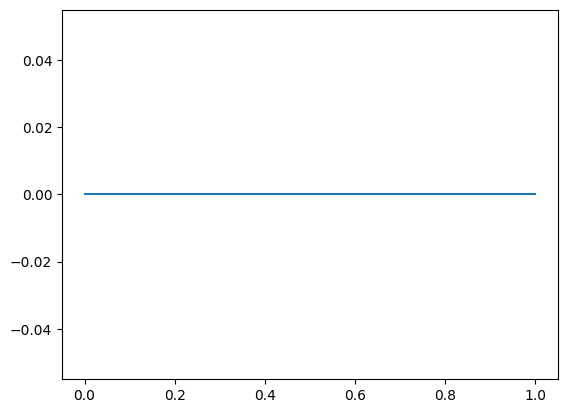

In [47]:
dl.plot(u)
plt.show()

In [46]:
u

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 114), FiniteElement('Lagrange', interval, 1)), 237)